<a href="https://colab.research.google.com/github/AmandeepSingh789/AmandeepSingh789/blob/main/feed_forward_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


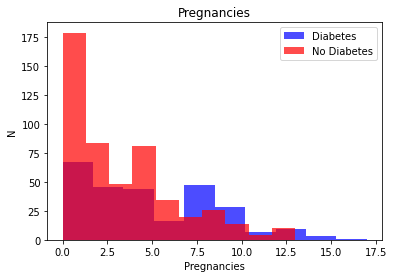

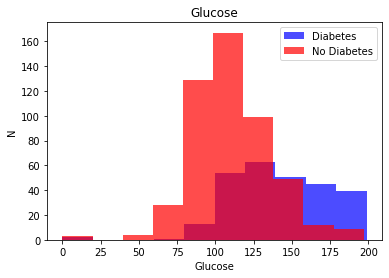

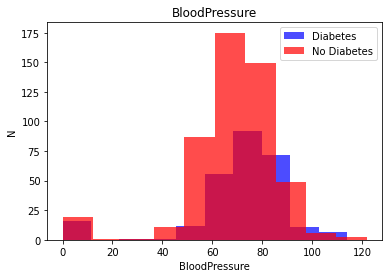

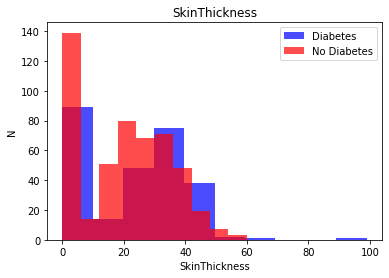

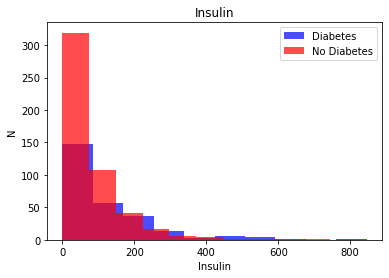

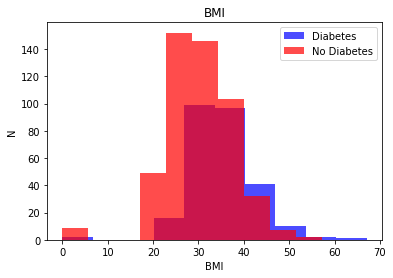

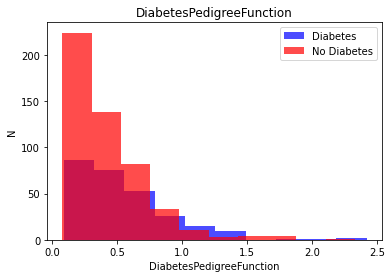

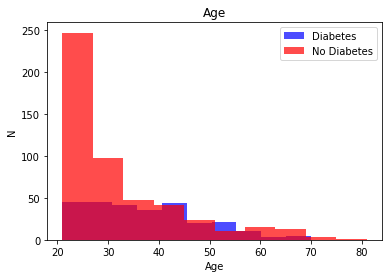

In [7]:
for i in range (len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',label="Diabetes",alpha=0.7)
  plt.hist(df[df['Outcome']==0][label],color='red',label="No Diabetes",alpha=0.7)
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()
  plt.show()